# 

Sathwika 
2109668152

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df=pd.read_csv("bollywood.csv")

In [77]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


How many records are present in the dataset?

In [78]:
df.shape[0]

149

How many movies got released in each genre? Sort number of releases in each genre 
in descending order

In [79]:
df['Genre']=df['Genre'].str.strip()
df['Genre'].value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

Which genre had highest number of releases?

In [80]:
df['Genre'].value_counts().nlargest(1)

Comedy    36
Name: Genre, dtype: int64

How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)


In [81]:
pd.crosstab(df.ReleaseTime,df.Genre)

Genre,Action,Comedy,Drama,Romance,Thriller
ReleaseTime,,,,,
FS,3,3,4,3,4
HS,3,5,6,3,1
LW,3,5,1,4,2
N,15,23,24,15,22


Which month of the year, maximum number movie releases are seen? (Note: Extract a
new column called month from ReleaseDate column.)

In [82]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Month'] = df['Release Date'].dt.month
df.Month.value_counts()

1     20
3     19
5     18
2     16
7     16
4     11
6     10
9     10
11    10
10     9
8      8
12     2
Name: Month, dtype: int64

Which month of the year typically sees most releases of high budgeted movies, that is,
movies with budget of 25 crore or more?

In [83]:
df[df.Budget>=25]['Release Date'].dt.month.value_counts()

2     9
1     8
3     7
8     7
7     6
11    6
6     5
9     5
4     4
10    4
5     3
12    2
Name: Release Date, dtype: int64

Which are the top 10 movies with maximum return on investment (ROI)? Calculate
return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [84]:
df['ROI'] = (df.BoxOfficeCollection - df.Budget)/df.Budget
df.sort_values(by='ROI').MovieName[0:10]

9                 Gangoobai
15                  Bandook
53                 Sona Spa
3          Rajdhani Express
49     Kya Dilli Kya Lahore
121                 Satya 2
67             Purani Jeans
103          Samrat and Co.
30                Heartless
102                 Kaanchi
Name: MovieName, dtype: object

Do the movies have higher ROI if they get released on festive seasons or long
weekend? Calculate the average ROI for different release times.

In [85]:
df.groupby(by='ReleaseTime').ROI.mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [86]:
corr = df[['BoxOfficeCollection', 'YoutubeLikes']].corr()
corr

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='Genre', ylabel='YoutubeViews'>

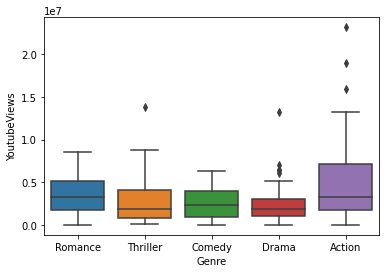

In [87]:
sns.boxplot(x='Genre', y='YoutubeViews', data=df)

Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

<AxesSubplot:>

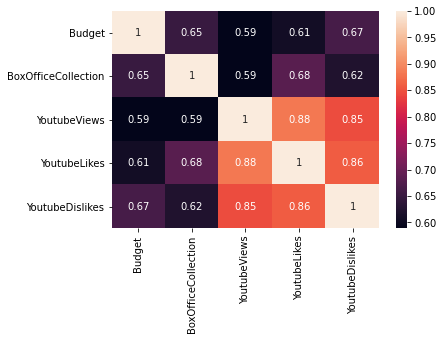

In [88]:
corr = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()
sns.heatmap(corr, annot=True)

During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.

In [89]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year
df.Year.value_counts()

2014    70
2013    67
2015    12
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='BoxOfficeCollection'>

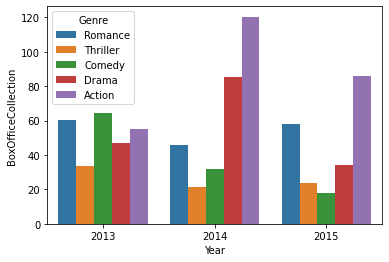

In [90]:
sns.barplot(x='Year', y='BoxOfficeCollection', hue='Genre', data=df, ci=None)

Visualize the Budget and Box office collection based on Genre.

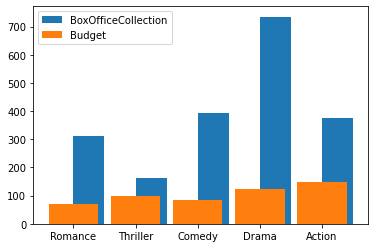

In [91]:
plt.bar(df['Genre'],df['BoxOfficeCollection'],align='edge',label='BoxOfficeCollection',width=0.5)
plt.bar(df['Genre'],df['Budget'],label='Budget')
plt.legend()  

Find the distribution of movie budget for every Genre.

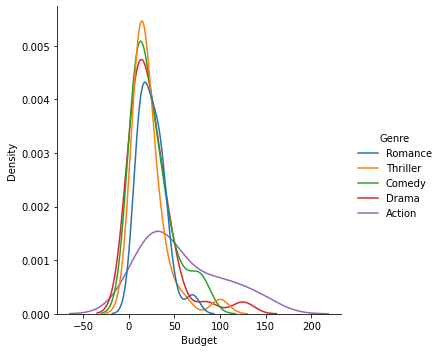

In [92]:
sns.displot(x='Budget', data=df, kind='kde', hue='Genre')

During 2013−2015, find the number of movies released in every year. Also, visualize
with best fit graph.

<AxesSubplot:>

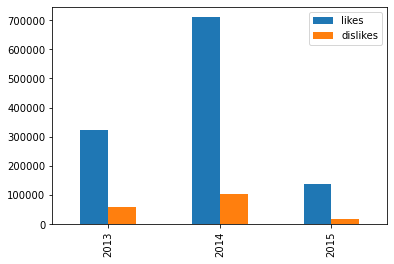

In [93]:
df.groupby(by='Year').YoutubeLikes.sum()
df.groupby(by='Year').YoutubeDislikes.sum()
likes = [324180, 710142, 139431]
dislikes = [58156, 104682, 17127]
year = ['2013', '2014', '2015']
compare = pd.DataFrame({'likes':likes, 'dislikes':dislikes}, index=year)
compare.plot.bar()

Skewness

In [94]:
da=df.skew()
da=pd.DataFrame(np.array(da))
da

,0
0,0.000000
1,2.059560
2,3.980880
3,2.667002
4,4.391138
5,3.534963
6,0.333857
7,2.097733
8,0.479715


<AxesSubplot:ylabel='Density'>

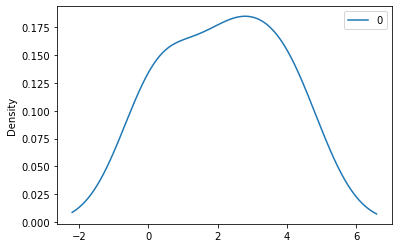

In [95]:
da.plot(kind='density')

Kurtosis

<AxesSubplot:ylabel='Density'>

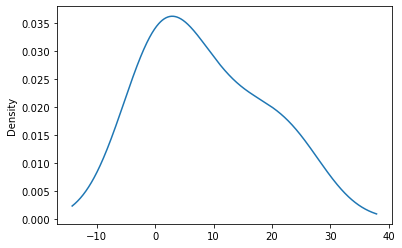

In [96]:
db=df.kurtosis(numeric_only=None)
db
db.plot(kind='density')